Deep Learning
=============

Assignment Sparse Autoencoder
------------

Structured from `2_fullyconnected.ipynb`

The goal of this assignment is to train a sparse autoencoder network on MNIST Data and visulize its validation data reconstruction.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import re
import sys
import pickle

import numpy as np
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
fbf = open('feature_baises_9700000.pkl', 'rb')
fwf = open('feature_weights_9700000.pkl', 'rb')
feature_weights = pickle.load(fwf)
feature_baises = pickle.load(fbf)
fwf.close()
fbf.close()

First we load the MNIST data

In [5]:
data_set = input_data.read_data_sets('', False)
training_data = data_set.train
testing_data = data_set.test

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


Checking  the data

In [6]:
images_feed, labels_feed = training_data.next_batch(10000, False)
image_size = 28
num_labels = 10
np.min(images_feed)

0.0

Do validation testing:
- data as a flat matrix,


In [7]:
validation_data = data_set.validation
valid_batch, validation_labels = validation_data.next_batch(validation_data.num_examples)

In [23]:
beta = 3
rho = .1
nHidden = 196
image_size = 28
batch_size = 128

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, image_size * image_size))
    tf_valid_dataset = tf.constant(valid_batch)
    tf_old_feature_weights = tf.constant(feature_weights)
    tf_old_feature_baises = tf.constant(feature_baises)
   
    # Variables.
    weights_hidden1 = tf.Variable(tf_old_feature_weights)
    biases_hidden1 = tf.Variable(tf.zeros([nHidden]))
  
    # Training computation.
    hidden_comp = tf.matmul(tf_train_dataset, weights_hidden1)
    hidden1 = tf.nn.sigmoid(tf.mul(hidden_comp + biases_hidden1,8))
    output_units = tf.nn.sigmoid(tf.matmul(hidden1, tf.transpose(weights_hidden1)))
    loss = tf.div(tf.nn.l2_loss(tf.sub(output_units, tf_train_dataset)),
                  tf.constant(float(batch_size)))
              
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
  
    # Predictions for the training, validation, and test data.
    valid_output_units = tf.nn.sigmoid(tf.matmul(
                             tf.nn.sigmoid(tf.mul(tf.matmul(tf_valid_dataset, 
                                                            weights_hidden1) 
                                                  + biases_hidden1, 
                                                  8)),
                             tf.transpose(weights_hidden1)))
    valid_loss = tf.div(tf.nn.l2_loss(tf.sub(valid_output_units, tf_valid_dataset)),
                       tf.constant(float(batch_size)))
    #l2_loss variation check
    #adaptive beta
    #sigmoid output

In [ ]:
step = 0

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    batch_data, _ = training_data.next_batch(batch_size)
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    v_l = 20000
    while True:
        step += 1
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        # Generate a minibatch.
        batch_data, _ = training_data.next_batch(batch_size)
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset: batch_data}
        _, l, feature_weights, feature_biases = session.run(
                                                  [optimizer, loss, weights_hidden1, biases_hidden1], 
                                                  feed_dict=feed_dict)
        if step%100000 == 0:
            fbf = open('feature_baises_' + str(step) + '.pkl', 'wb')
            pickle.dump(feature_biases, fbf)
            fbf.close()
            fwf = open('feature_weights_' + str(step) + '.pkl', 'wb')
            pickle.dump(feature_weights, fwf)
            fwf.close()

        if step%500 == 0:
            prev_v_l = v_l
            _, l, v_l, valid_out_data = session.run(
                                            [optimizer, loss, valid_loss,valid_output_units],
                                            feed_dict=feed_dict)
            print("step", step, " \tTrain loss ", l, "\tValid loss", v_l)
            if prev_v_l < v_l:
                break

### Output from the Run on cluster

.
.
.
.

step 9750000    Train loss  2.56298     Valid loss 113.472

step 9750500    Train loss  2.80224     Valid loss 113.468

step 9751000    Train loss  2.59853     Valid loss 113.471
step 9751500    Train loss  2.65598     Valid loss 113.47
step 9752000    Train loss  2.50461     Valid loss 113.47
step 9752500    Train loss  2.63187     Valid loss 113.468
step 9753000    Train loss  2.84001     Valid loss 113.472
step 9753500    Train loss  2.6863      Valid loss 113.471
step 9754000    Train loss  2.73344     Valid loss 113.47
step 9754500    Train loss  2.63237     Valid loss 113.47
step 9755000    Train loss  2.52693     Valid loss 113.47
step 9755500    Train loss  2.56478     Valid loss 113.469
step 9756000    Train loss  2.50033     Valid loss 113.469
step 9756500    Train loss  2.6211      Valid loss 113.469

## Need to do the following to get the validation data
##### Because the run was done on the cluster.

In [25]:
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    valid_out_data = valid_output_units.eval()
                                

Initialized


## Displaying the reconstruction of first 100 input images in validation by trained sparse autoencoder

In [3]:
if re.search("ipykernel", sys.argv[0]) :
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    print("Matplotlib is inline")
    %matplotlib inline
    

Matplotlib is inline


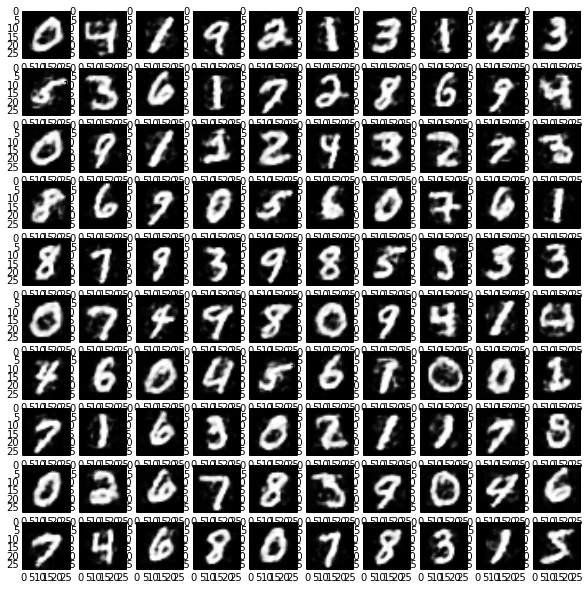

In [26]:
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i)
    ax.imshow(valid_out_data[i].reshape(image_size, image_size), cmap=cm.gray)

### Displaying the first 100 features used to do the reconstruction

(784, 196)
(196, 784)


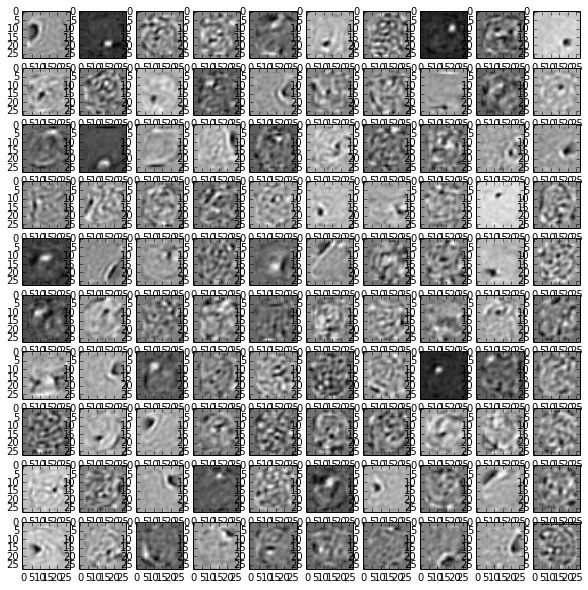

In [4]:
image_size = 28
print(feature_weights.shape)
features=feature_weights.transpose()  
print(features.shape)

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i)
    ax.imshow(features[i].reshape(image_size, image_size), cmap=cm.gray)

## Training Softmax Classifier

In [13]:
test_dataset, testing_labels = testing_data.next_batch(testing_data.num_examples)

In [14]:
batch_size = 128
num_labels = 10
nHidden = 196
beta = 3
rho = .1
tf.reset_default_graph()
graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    weights_hidden1 = tf.constant(feature_weights)
    biases_hidden1 = tf.constant(feature_baises)
    tf_train_dataset = tf.placeholder(tf.float32,
                                      shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_batch)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    logit_weights= tf.Variable(tf.truncated_normal([nHidden, num_labels]))
    logit_biases = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    hidden1 = tf.nn.sigmoid(tf.mul(tf.matmul(tf_train_dataset, weights_hidden1)  + biases_hidden1, 8))
    logits = tf.matmul(hidden1, logit_weights) + logit_biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(
      tf.nn.sigmoid(tf.matmul(tf_valid_dataset, weights_hidden1) + biases_hidden1), logit_weights) + logit_biases)
    test_prediction = tf.nn.softmax(tf.matmul(
      tf.nn.sigmoid(tf.matmul(tf_test_dataset, weights_hidden1) + biases_hidden1), logit_weights) + logit_biases)

In [29]:
def reformat(labels):
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return labels

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

def save_data(weights, biases, weights_filename, biases_filename, step):
    fbf = open(biases_filename + str(step) + '.pkl', 'wb')
    pickle.dump(biases, fbf)
    fbf.close()
    fwf = open(weights_filename + str(step) + '.pkl', 'wb')
    pickle.dump(weights, fwf)
    fwf.close()

In [18]:
def save_for_supervised():
    return save_data(weights, biases, 'out_weights_', 'out_biases_', step)

step = 0
valid_labels = reformat(validation_labels)
valid_acc = 0
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    while True:
        step += 1
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        batch_data, labels = training_data.next_batch(batch_size)
        batch_labels = reformat(labels)
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset: batch_data, tf_train_labels: batch_labels}
        _, l, predictions, weights, biases = session.run([optimizer, loss, train_prediction,
                                                          logit_weights, logit_biases],
                                                         feed_dict=feed_dict)
        if step%500 == 0:
            prev_valid_acc = valid_acc
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, 
                                                          batch_labels))

            valid_acc = accuracy(valid_prediction.eval(), valid_labels)
            print("Validation accuracy: %.1f%%" % valid_acc)
            
            if prev_valid_acc > valid_acc:
                save_for_supervised()
                break
                
        if step%100000 == 0:
            save_for_supervised()
            
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(),
                                             test_labels))

Initialized
Minibatch loss at step 500: 10.880217
Minibatch accuracy: 7.0%
Validation accuracy: 11.0%
Minibatch loss at step 1000: 8.890375
Minibatch accuracy: 9.4%
Validation accuracy: 13.1%
Minibatch loss at step 1500: 8.805999
Minibatch accuracy: 12.5%
Validation accuracy: 15.6%
Minibatch loss at step 2000: 8.597724
Minibatch accuracy: 10.2%
Validation accuracy: 17.6%
Minibatch loss at step 2500: 7.391232
Minibatch accuracy: 10.9%
Validation accuracy: 19.3%
Minibatch loss at step 3000: 6.912096
Minibatch accuracy: 19.5%
Validation accuracy: 20.5%
Minibatch loss at step 3500: 6.571461
Minibatch accuracy: 20.3%
Validation accuracy: 22.1%
Minibatch loss at step 4000: 6.812347
Minibatch accuracy: 14.8%
Validation accuracy: 23.9%
Minibatch loss at step 4500: 6.223026
Minibatch accuracy: 25.0%
Validation accuracy: 25.8%
Minibatch loss at step 5000: 5.373596
Minibatch accuracy: 26.6%
Validation accuracy: 27.7%
Minibatch loss at step 5500: 5.407998
Minibatch accuracy: 31.2%
Validation accur

In [20]:
valid_acc

82.76

In [27]:
prev_valid_acc

82.78

In [30]:
save_data(weights, biases, 'out_weights', 'out_biases', step)